***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://www.ibge.gov.br/ 

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv('./dados/dadosIBGE.csv')

### Visualize o conteúdo do DataFrame

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes =[df.Renda.min(),
          2 * 788,
          5 * 788,
          15 * 788,
          25 * 788
          ,df.Renda.max()]
classes

[np.int64(0), 1576, 3940, 11820, 19700, np.int64(200000)]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = df.value_counts(
       pd.cut(x = df.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))
frequencia

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
porcentagem = df.value_counts(
       pd.cut(x = df.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True),
       normalize = True) * 100
porcentagem

Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
df_freq = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem(%)': porcentagem})
df_freq.sort_index(ascending = False, inplace = True)
df_freq

,Frequencia,Porcentagem(%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

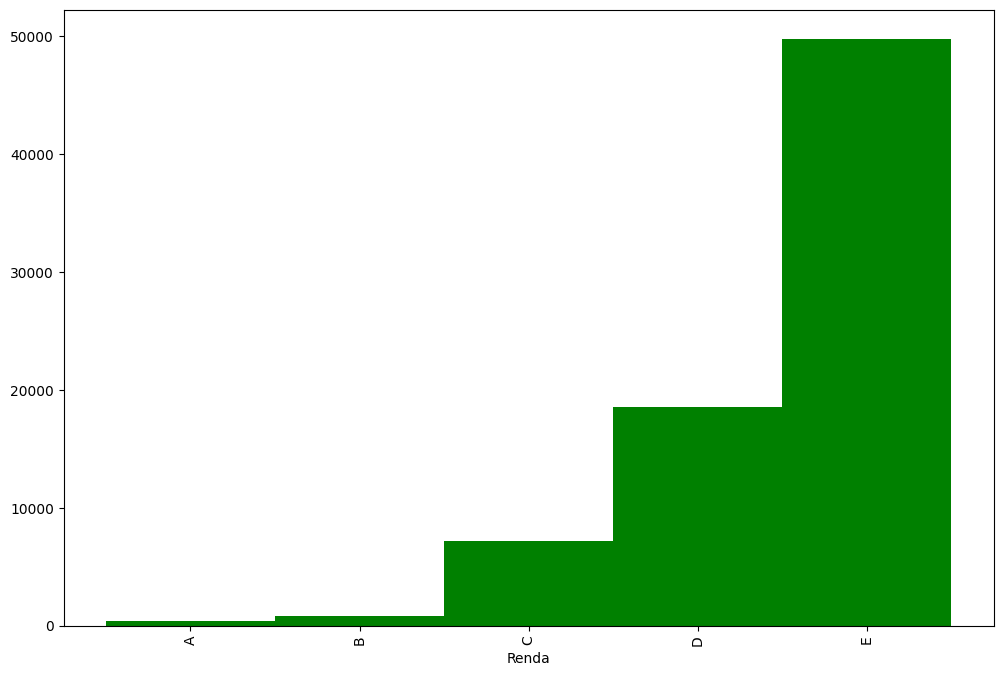

In [9]:
df_freq.Frequencia.plot.bar(width=1, color= 'green',figsize = (12,8))

> ### Conclusões

É evidente que a população da classe E é muito superior que as demais.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: title={'center': 'Distribuição de Frequências- Altura'}, xlabel='Metros', ylabel='Pessoas'>

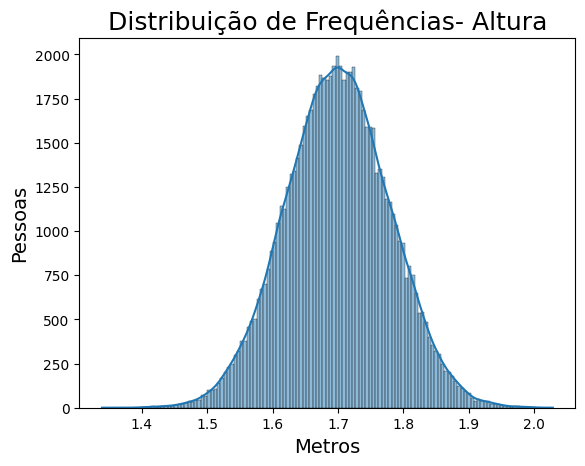

In [10]:
ax = sns.histplot(df.Altura, kde = True)
ax.figure.setsize = (12, 16)
ax.set_title('Distribuição de Frequências- Altura', fontsize= 18)
ax.set_xlabel('Metros',fontsize = 14)
ax.set_ylabel('Pessoas', fontsize = 14)
ax

<Axes: title={'center': 'Distribuição de Frequências - Renda por Classe'}, xlabel='Classe de Renda', ylabel='Pessoas'>

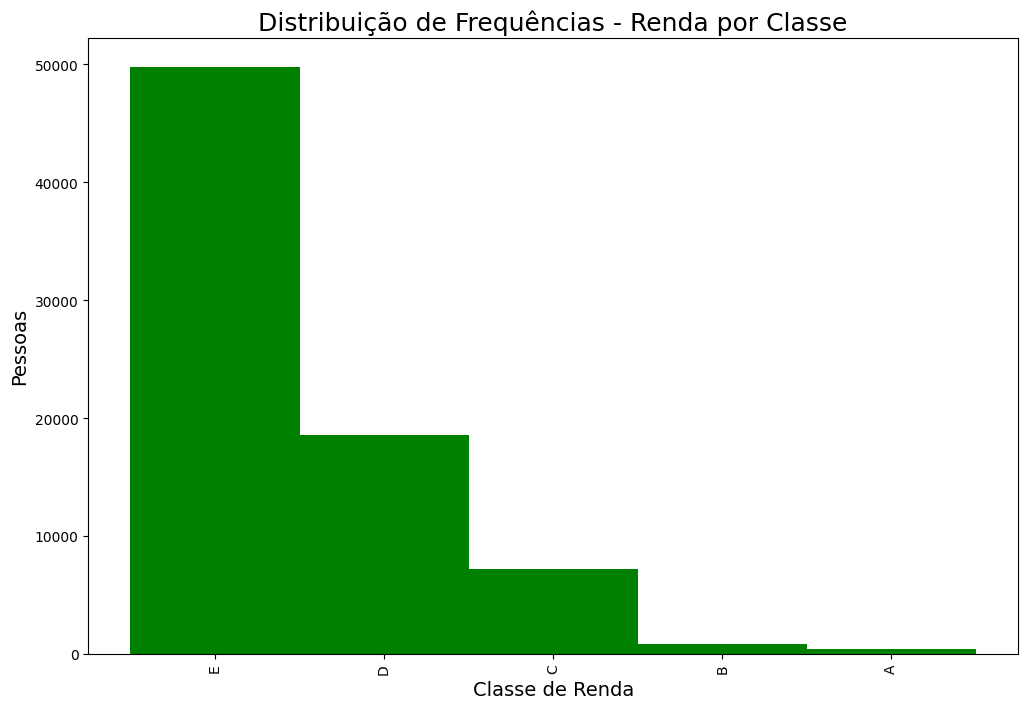

In [11]:
renda_categorizada = pd.cut(df.Renda, bins=classes, labels=labels, include_lowest=True)
ax = renda_categorizada.value_counts(sort=False).plot.bar(width=1, color='green', figsize=(12, 8))
ax.set_title('Distribuição de Frequências - Renda por Classe', fontsize=18)
ax.set_xlabel('Classe de Renda', fontsize=14)
ax.set_ylabel('Pessoas', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências- Idade'}, xlabel='Anos', ylabel='Pessoas'>

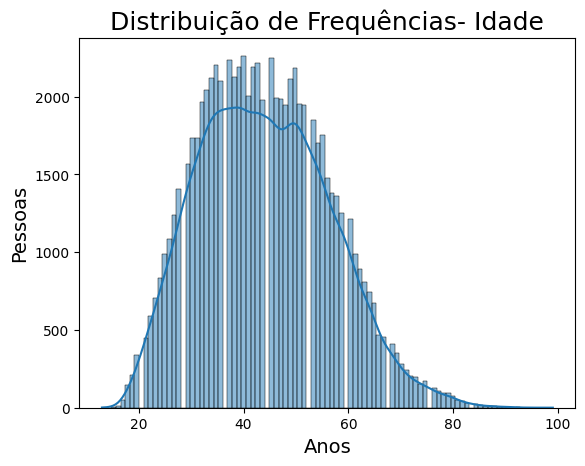

In [12]:
ax = sns.histplot(df.Idade, kde = True)
ax.figure.setsize = (12, 16)
ax.set_title('Distribuição de Frequências- Idade', fontsize= 18)
ax.set_xlabel('Anos',fontsize = 14)
ax.set_ylabel('Pessoas', fontsize = 14)
ax

> ### Conclusões

Pode-se reparar que os dados de Altura estam muito mais equilibrado que os outros, sendo um histograma simétrico,
já a variável renda está muito desequilibrada, mostrando uma assimetria à direita.
Agora a Idade está apenas um pouco deslocada da esquerda.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Distribuição de Renda até 20000'}, xlabel='R$', ylabel='Pessoas'>

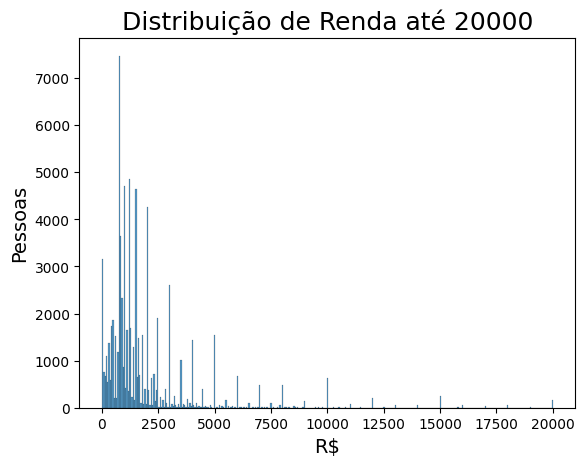

In [13]:
ax = sns.histplot(df.query('Renda <=20000'), x= 'Renda', kde = False, )
ax.figure.setsize = (12, 16)
ax.set_title('Distribuição de Renda até 20000', fontsize= 18)
ax.set_xlabel('R$',fontsize = 14)
ax.set_ylabel('Pessoas', fontsize = 14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [15]:
frequencia = pd.crosstab(df.Sexo, df.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

In [16]:
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

Pode-se reparar que existe uma grande quantidades de pessoas com uma renda menor, mesmo com o limite de R$20.000,00.

É possível ver que, de acordo com os dados, aproximadamente existem duas vezes mais homens doque mulheres por cor.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
df.Renda.mean()

np.float64(2000.3831988547631)

### Obtenha a mediana

In [18]:
df.Renda.median()

np.float64(1200.0)

### Obtenha a moda

In [19]:
df.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [20]:
abs(df.Renda - df.Renda.mean()).mean()

np.float64(1526.4951371638058)

### Obtenha a variância

In [21]:
df.Renda.var()

np.float64(11044906.006217021)

### Obtenha o desvio-padrão

In [22]:
df.Renda.std()

np.float64(3323.3877303464037)

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
frequencia = pd.crosstab(df.Sexo, df.Cor,values = df.Renda, aggfunc=('mean','median','max'))
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

As mulheres indígenas são as unicas a ganharem dos homens em máximo e média, mas perdem na mediana(por pouco).

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
frequencia = pd.crosstab( df.Cor,df.Sexo, df.Renda, aggfunc=('var','std'))
frequencia.rename(index = cor, inplace = True)
frequencia.rename(columns = sexo, inplace = True)
frequencia

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

Pode se reparar que o desvio padrão das mulheres é menor, tirando as indígenas, que possuem a maior varialçao da lista.
Enquanto a variação, é bem parecida entre generos, menos com os indígenas.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Sexo e Cor'}, xlabel='R$', ylabel='Cor'>

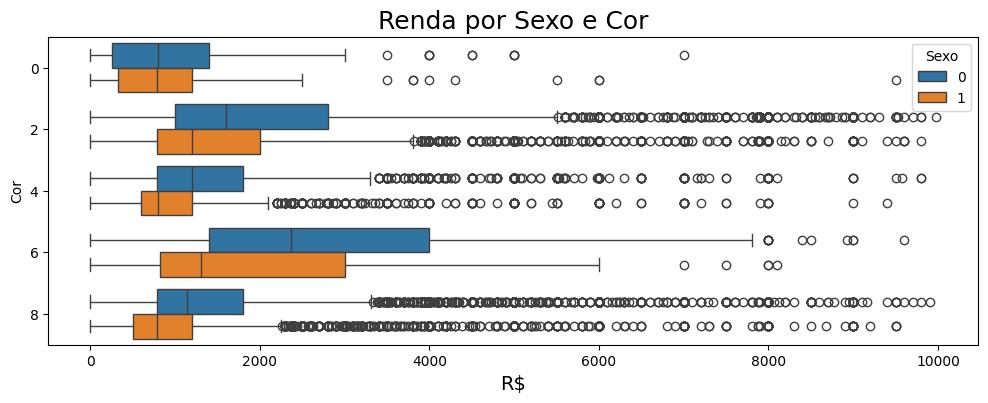

In [25]:
ax = sns.boxplot( x = 'Renda', y = 'Cor', hue = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Sexo e Cor', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax


> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [26]:
from scipy import stats
stats.percentileofscore(df.Renda, 788, kind = 'weak')


np.float64(28.867777199375325)

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [27]:
df.Renda.quantile(0.99)

np.float64(15000.0)

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [28]:
frequencia = pd.crosstab(df['Anos de Estudo'], df.Sexo, values = df.Renda, aggfunc=('mean','max','std')).round(2)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

max             mean               std         
Sexo           Indígena       1 Indígena        1 Indígena        1
Anos de Estudo                                                     
Feminino          30000   10000   799.49   516.20  1023.90   639.31
2                 30000    2000   895.63   492.77  1331.95   425.29
3                 40000    4000   931.18   529.91  1435.17   498.23
4                 80000    3500  1109.20   546.85  2143.80   424.12
5                 50000   10000  1302.33   704.28  1419.82   629.55
6                 35000    8000  1338.65   781.39  1484.65   635.78
7                 25000    6000  1448.88   833.73  1476.63   574.55
8                 40000    9000  1465.50   830.75  1419.71   602.04
9                 30000   18000  1639.40   933.62  1515.58   896.78
10                60000   20000  1508.04   868.02  2137.66   973.22
11                45000    6000  1731.27   925.92  2078.61   620.61
12               200000  100000  2117.06  1286.79  2676.54  1819.04
13                30000  120000  2470.33  1682.31  2268.08  4851.83
14                25000   20000  3195.10  1911.73  2797.12  2053.79
15                50000   20000  3706.62  2226.46  3987.21  2064.08
16               200000  100000  6134.28  3899.51  7447.61  4212.77
17                 7000    3000  1295.76   798.17   979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

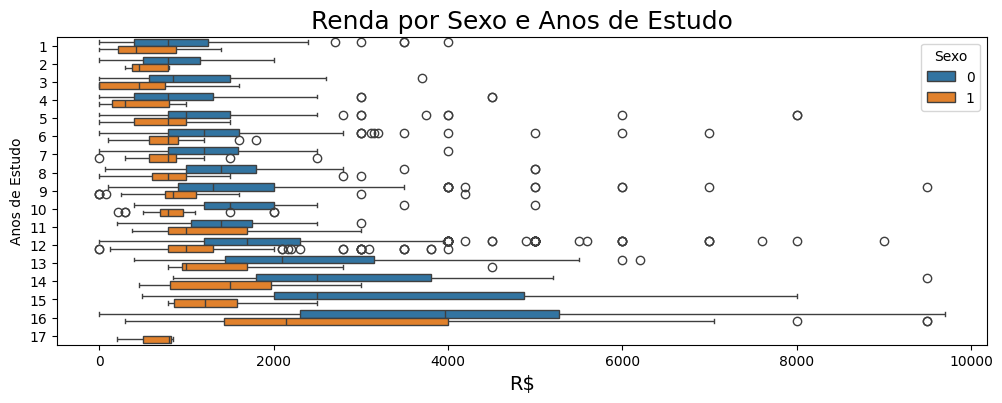

In [29]:
ax = sns.boxplot( x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = df.query('Renda < 10000 & Idade == 40'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Sexo'>

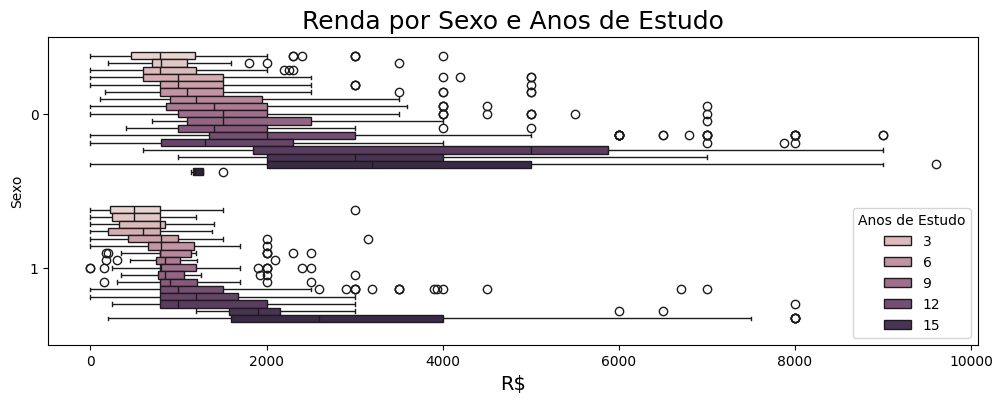

In [30]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', hue = 'Anos de Estudo', data = df.query('Renda < 10000 & Idade == 50'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Existe uma grande diferença entre as idades(50 e 40 anos). Os homens mais velhos tendem a terem mais anos de estudo em média, e consequentemente, ganham mais. Já com as mulheres, não existe uma diferença muito grande.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [31]:
df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='UF'>

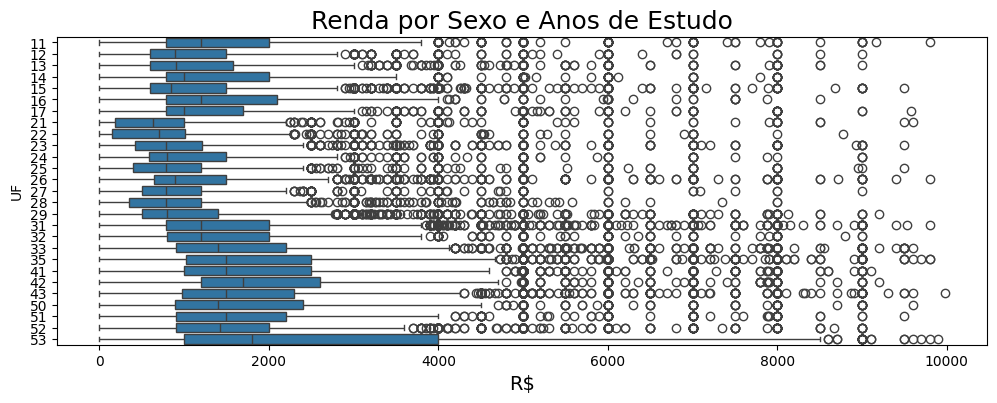

In [32]:
ax = sns.boxplot( x = 'Renda', y = 'UF', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax